[1.         0.99993834 0.99987667 ... 0.09475175 0.10501585 0.11527995]


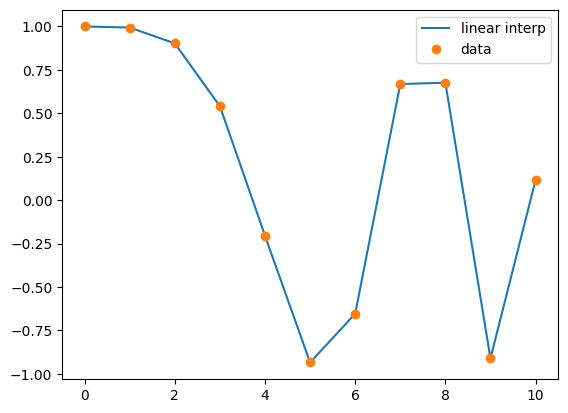

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11)

y = np.cos(-x**2 / 9.0)

xnew = np.linspace(0, 10, num=1001)

ynew = np.interp(xnew, x, y)
print(ynew)


plt.plot(xnew, ynew, '-', label='linear interp')

plt.plot(x, y, 'o', label='data')

plt.legend(loc='best')

plt.show()


In [2]:
import os
os.path.abspath("")

'/home/nikit/Documents/works/personal/road-condition-monitoring/guessr/examples'

In [3]:
import json

with open('../data/app/input-data.jsons', 'r') as datafile:
  line1 = datafile.readline()
  v = json.loads(line1)
  print(v)
  for [i, line] in enumerate(datafile.readlines()):
    with open(f'../data/app/input-{i}.json', 'w') as wfile:
      wfile.write(line)



{'accelerometerData': [{'time': None, 'x': None, 'y': None, 'z': None, 'ms': None}], 'gyroscopeData': [{'time': None, 'x': None, 'y': None, 'z': None, 'ms': None}], 'gpsData': [{'time': None, 'latitude': None, 'longitude': None, 'accuracy': None, 'ms': None}, {'time': '2024-04-10T21:29:45.595159', 'latitude': 59.7248667, 'longitude': 30.5406517, 'accuracy': 3.9000000953674316, 'ms': None}]}


In [4]:
import pandas
import datetime

path = '../data/app/input-0.json'

def obj_set_time_to_int(obj):
  if (obj['time'] is not None):
    obj['time'] = int(datetime.datetime.fromisoformat(obj['time']).timestamp() * 1000000)
  return obj

with open(path) as file:
  data = json.loads(file.readline())
  accelerometerData = map(obj_set_time_to_int, data['accelerometerData'])
  gyroscopeData = map(obj_set_time_to_int, data['gyroscopeData'])
  gpsData = map(obj_set_time_to_int, data['gpsData'])

  acDf = pandas.DataFrame([o for o in accelerometerData])
  gyDf = pandas.DataFrame([o for o in gyroscopeData])
  gpsDf = pandas.DataFrame([o for o in gpsData])
  
  print(acDf, gyDf, gpsDf, sep='\n')
  print(acDf.dtypes, gyDf.dtypes, gpsDf.dtypes, sep='\n')

             time      x      y      z    ms
0             NaN    NaN    NaN    NaN   NaN
1    1.712774e+15  0.056  0.337  0.677   NaN
2    1.712774e+15 -0.003  0.273  0.384  34.0
3    1.712774e+15 -0.066 -0.404 -0.167  37.0
4    1.712774e+15  0.019  0.184  0.126  24.0
..            ...    ...    ...    ...   ...
279  1.712774e+15  0.541  0.284  0.698  33.0
280  1.712774e+15 -0.127  0.550 -0.556  20.0
281  1.712774e+15 -0.378 -0.194  0.729  20.0
282  1.712774e+15  0.348 -0.396 -0.786  20.0
283  1.712774e+15  0.084  0.450  0.556  38.0

[284 rows x 5 columns]
             time         x         y         z    ms
0             NaN       NaN       NaN       NaN   NaN
1    1.712774e+15  0.095563 -0.009350  0.016225   NaN
2    1.712774e+15  0.068750  0.027362 -0.003300  34.0
3    1.712774e+15  0.024750 -0.043450  0.008800  34.0
4    1.712774e+15 -0.040013  0.011550 -0.009488  37.0
..            ...       ...       ...       ...   ...
293  1.712774e+15  0.030800  0.106837 -0.022825  38.0
294 

/tmp/ipykernel_1427400/2538462858.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [5]:
acDfc = acDf[acDf.ms.notna()]
gyDfc = gyDf[gyDf.ms.notna()]
gpsDfc = gpsDf[gpsDf.ms.notna()]

print(acDfc, gyDfc, gpsDfc, sep='\n')

             time      x      y      z    ms
2    1.712774e+15 -0.003  0.273  0.384  34.0
3    1.712774e+15 -0.066 -0.404 -0.167  37.0
4    1.712774e+15  0.019  0.184  0.126  24.0
5    1.712774e+15 -0.101  0.166 -0.382  33.0
6    1.712774e+15  0.065  0.732  0.420  25.0
..            ...    ...    ...    ...   ...
279  1.712774e+15  0.541  0.284  0.698  33.0
280  1.712774e+15 -0.127  0.550 -0.556  20.0
281  1.712774e+15 -0.378 -0.194  0.729  20.0
282  1.712774e+15  0.348 -0.396 -0.786  20.0
283  1.712774e+15  0.084  0.450  0.556  38.0

[282 rows x 5 columns]
             time         x         y         z    ms
2    1.712774e+15  0.068750  0.027362 -0.003300  34.0
3    1.712774e+15  0.024750 -0.043450  0.008800  34.0
4    1.712774e+15 -0.040013  0.011550 -0.009488  37.0
5    1.712774e+15  0.068750  0.131175  0.024750  24.0
6    1.712774e+15 -0.033962 -0.215737  0.051562  33.0
..            ...       ...       ...       ...   ...
293  1.712774e+15  0.030800  0.106837 -0.022825  38.0
294 

In [6]:
# len is not 0
def get_df_time_range(df: pandas.DataFrame):
  l = len(df.index)
  return (df.iloc[0].time, df.iloc[l - 1].time, l)

acTse = get_df_time_range(acDfc)
gyTse = get_df_time_range(gyDfc)
gpsTse = get_df_time_range(gpsDfc)
print(acTse, gyTse, gpsTse, sep='\n')

(1712773789151947.0, 1712773798572341.0, 282)
(1712773789151834.0, 1712773798591845.0, 296)
(1712773790586626.0, 1712773798586914.0, 2)


In [7]:
import datetime 


def get_diff_time(start: str, end: str):
  return (end - start)

print(get_diff_time(acTse[0], acTse[1]), acTse[2])
print(get_diff_time(gyTse[0], gyTse[1]), gyTse[2])
print(get_diff_time(gpsTse[0], gpsTse[1]), gpsTse[2])

9420394.0 282
9440011.0 296
8000288.0 2


In [8]:
acDfcs = acDfc[acDfc.time > gpsTse[0]]
gyDfcs = gyDfc[gyDfc.time > gpsTse[0]]
gpsDfcs = gpsDfc
print(acDfcs, gyDfcs, gpsDfcs, sep='\n')

             time      x      y      z    ms
51   1.712774e+15 -0.374 -0.423 -0.106  33.0
52   1.712774e+15 -0.293  0.121  0.112  25.0
53   1.712774e+15  0.719  0.368  0.585  30.0
54   1.712774e+15 -0.183 -0.284 -0.396  21.0
55   1.712774e+15 -0.571 -0.004  0.568  28.0
..            ...    ...    ...    ...   ...
279  1.712774e+15  0.541  0.284  0.698  33.0
280  1.712774e+15 -0.127  0.550 -0.556  20.0
281  1.712774e+15 -0.378 -0.194  0.729  20.0
282  1.712774e+15  0.348 -0.396 -0.786  20.0
283  1.712774e+15  0.084  0.450  0.556  38.0

[233 rows x 5 columns]
             time         x         y         z    ms
52   1.712774e+15 -0.029012  0.155650 -0.055825  24.0
53   1.712774e+15  0.006325 -0.076450  0.005225  32.0
54   1.712774e+15  0.001512 -0.070400  0.013750  27.0
55   1.712774e+15 -0.009488  0.167887 -0.008250  27.0
56   1.712774e+15 -0.013200 -0.113163  0.002750  29.0
..            ...       ...       ...       ...   ...
293  1.712774e+15  0.030800  0.106837 -0.022825  38.0
294 

In [9]:
minXTime = int(max(acDfcs.iloc[0].time, gyDfcs.iloc[0].time))
maxXTime = int(min(acDfcs.iloc[len(acDfcs.index) - 1].time, gyDfcs.iloc[len(gyDfcs.index) - 1].time, gpsDfcs.iloc[len(gpsDfcs.index) - 1].time))

timeRange = (minXTime, maxXTime)
print(timeRange)


(1712773790606857, 1712773798572341)


In [10]:
import numpy

tick = 25000
window = 128
slide = 0.5

print(maxXTime - minXTime)
# interpolate to 50 ms
# 1 second = 1000000
sensorInterpTimes = numpy.arange(minXTime, maxXTime, tick)
print(sensorInterpTimes, len(sensorInterpTimes), sep='\n')

gpsInterpTimes = numpy.arange(minXTime + int(tick * window * slide / 2), maxXTime + int(tick * window * slide / 2), int(tick * window * slide))
print(gpsInterpTimes, len(gpsInterpTimes), sep='\n')

7965484
[1712773790606857 1712773790631857 1712773790656857 1712773790681857
 1712773790706857 1712773790731857 1712773790756857 1712773790781857
 1712773790806857 1712773790831857 1712773790856857 1712773790881857
 1712773790906857 1712773790931857 1712773790956857 1712773790981857
 1712773791006857 1712773791031857 1712773791056857 1712773791081857
 1712773791106857 1712773791131857 1712773791156857 1712773791181857
 1712773791206857 1712773791231857 1712773791256857 1712773791281857
 1712773791306857 1712773791331857 1712773791356857 1712773791381857
 1712773791406857 1712773791431857 1712773791456857 1712773791481857
 1712773791506857 1712773791531857 1712773791556857 1712773791581857
 1712773791606857 1712773791631857 1712773791656857 1712773791681857
 1712773791706857 1712773791731857 1712773791756857 1712773791781857
 1712773791806857 1712773791831857 1712773791856857 1712773791881857
 1712773791906857 1712773791931857 1712773791956857 1712773791981857
 1712773792006857 17127737

In [11]:
# visualize old values to graph
import matplotlib.pyplot as plt
import numpy as np

acTimes = acDfcs.time.to_numpy()
gyTimes = gyDfcs.time.to_numpy()
gpsTimes = gpsDfcs.time.to_numpy()


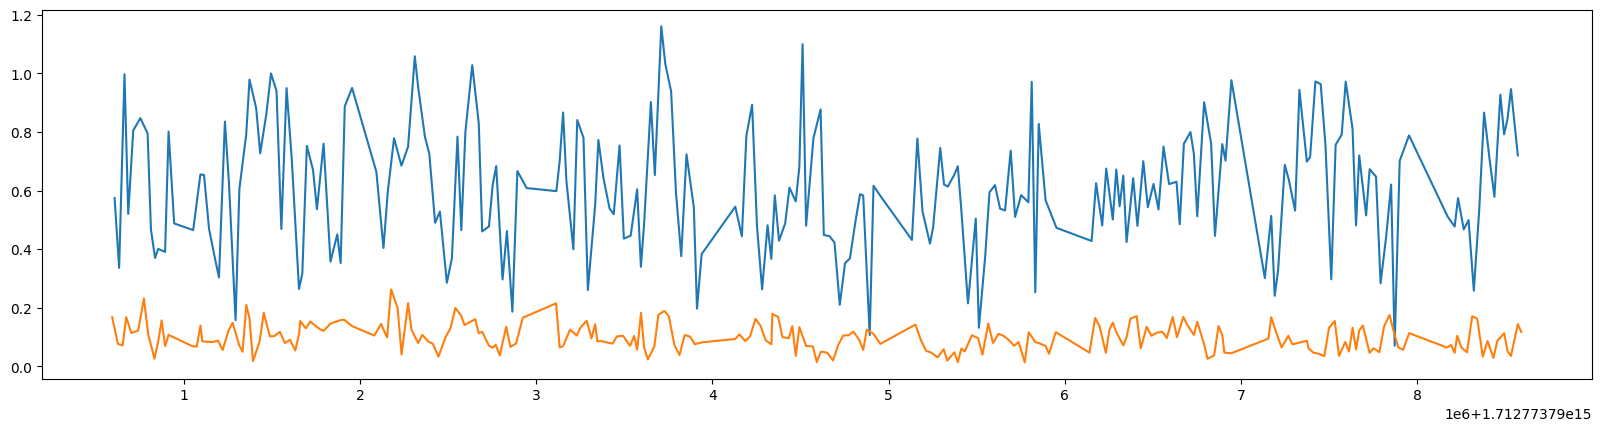

In [12]:
acX = acDfcs.x.to_numpy()
acY = acDfcs.y.to_numpy()
acZ = acDfcs.z.to_numpy()

ac = (acX ** 2 + acY ** 2 + acZ ** 2) ** 0.5

gyX = gyDfcs.x.to_numpy()
gyY = gyDfcs.y.to_numpy()
gyZ = gyDfcs.z.to_numpy()

gy = (gyX ** 2 + gyY ** 2 + gyZ ** 2) ** 0.5

plt.figure().set_figwidth(20)
# plt.plot(acTimes, acX, '-o')
# plt.plot(acTimes, acY, '-o')
plt.plot(acTimes, ac, '-')

# plt.plot(gyTimes, gyX, '-o')
# plt.plot(gyTimes, gyY, '-o')
plt.plot(gyTimes, gy, '-')

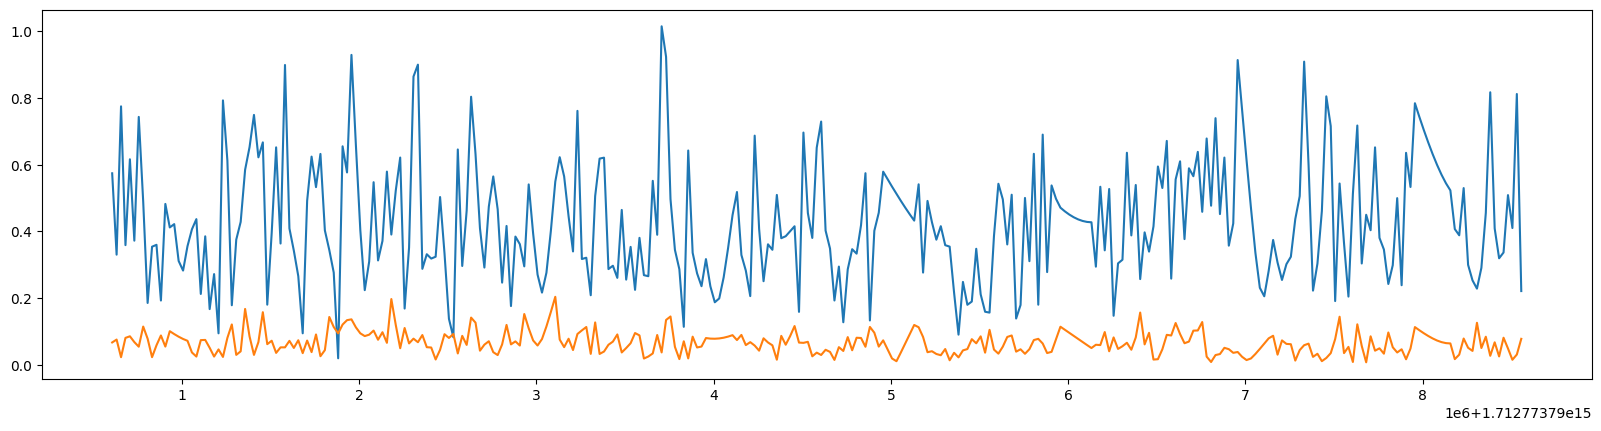

In [13]:
acXi = np.interp(sensorInterpTimes, acTimes, acX)
acYi = np.interp(sensorInterpTimes, acTimes, acY)
acZi = np.interp(sensorInterpTimes, acTimes, acZ)
gyXi = np.interp(sensorInterpTimes, gyTimes, gyX)
gyYi = np.interp(sensorInterpTimes, gyTimes, gyY)
gyZi = np.interp(sensorInterpTimes, gyTimes, gyZ)


aci = (acXi ** 2 + acYi ** 2 + acZi ** 2) ** 0.5
gyi = (gyXi ** 2 + gyYi ** 2 + gyZi ** 2) ** 0.5

plt.figure().set_figwidth(20)
# plt.plot(acTimes, acX, '-o')
# plt.plot(acTimes, acY, '-o')
plt.plot(sensorInterpTimes, aci, '-')

# plt.plot(gyTimes, gyX, '-o')
# plt.plot(gyTimes, gyY, '-o')
plt.plot(sensorInterpTimes, gyi, '-')

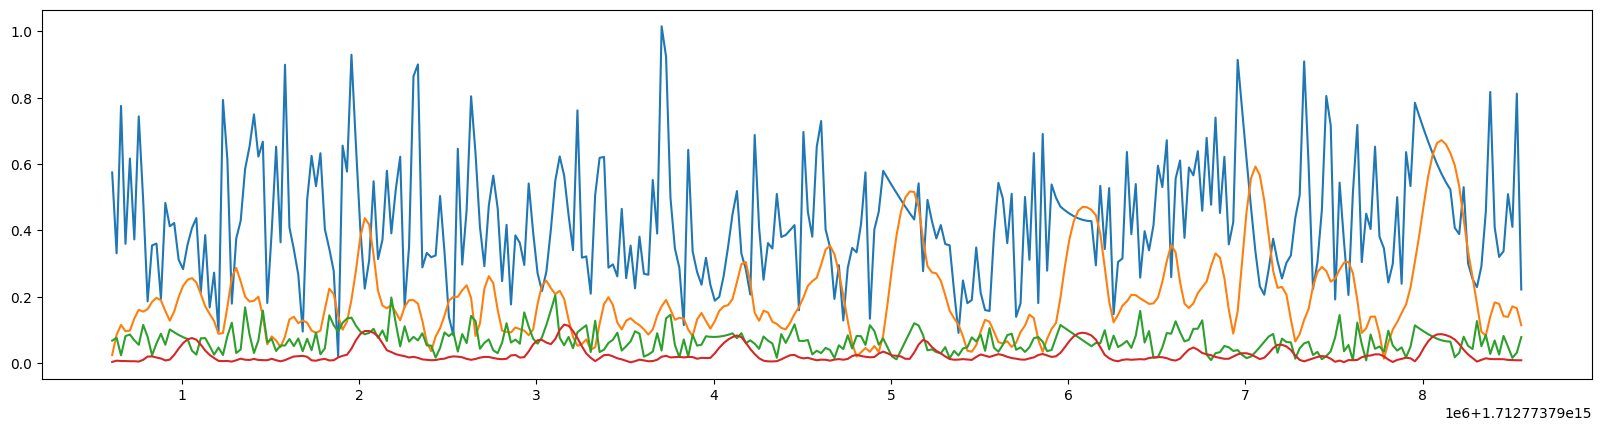

In [14]:
# low pass filter
from scipy.signal import lfilter, iirfilter

n = 15  # the larger n is, the smoother curve will be
fs = 1000000 / tick

# b = [1.0 / n] * n
# a = 1
b, a = iirfilter(2, Wn=3, fs=fs, btype="low", ftype="butter")

acXil = lfilter(b, a, acXi)
acYil = lfilter(b, a, acYi)
acZil = lfilter(b, a, acZi)

gyXil = lfilter(b, a, gyXi)
gyYil = lfilter(b, a, gyYi)
gyZil = lfilter(b, a, gyZi)

acil = (acXil ** 2 + acYil ** 2 + acZil ** 2) ** 0.5
gyil = (gyXil ** 2 + gyYil ** 2 + gyZil ** 2) ** 0.5

acil1 = lfilter(b, a, (acXi ** 2 + acYi ** 2 + acZi ** 2) ** 0.5)


plt.figure().set_figwidth(20)

plt.plot(sensorInterpTimes, aci, "-")
plt.plot(sensorInterpTimes, acil, "-")
plt.plot(sensorInterpTimes, gyi, "-")
plt.plot(sensorInterpTimes, gyil, "-")
# plt.plot(sensorInterpTimes, acil1, "-")
# plt.plot(sensorInterpTimes, gyil, "-o")

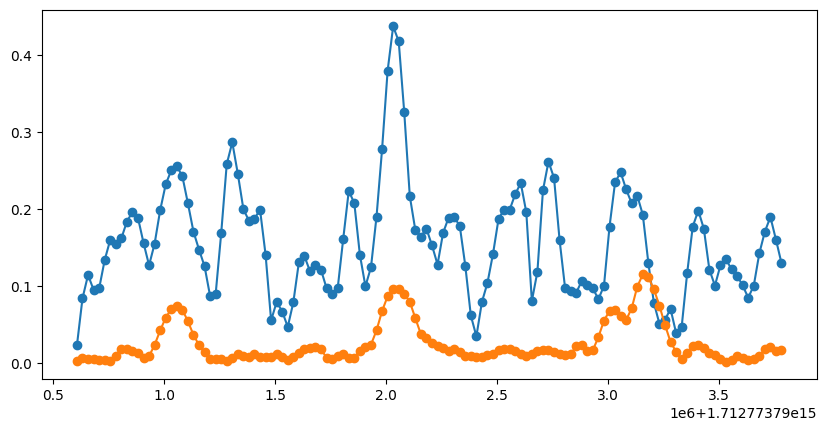

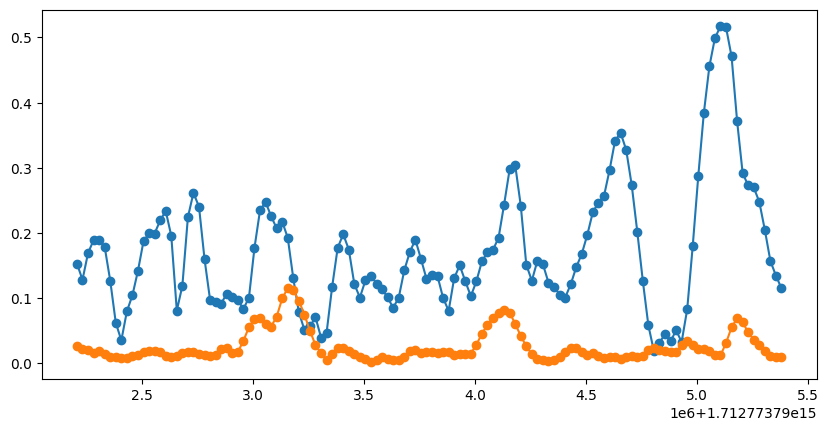

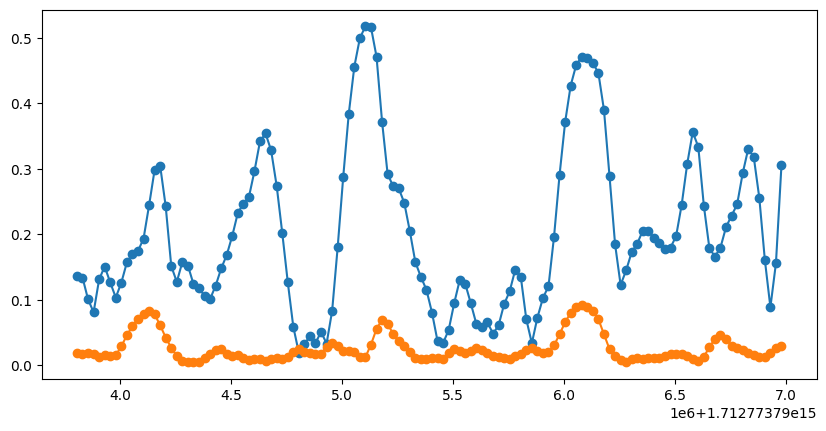

In [15]:
total = len(sensorInterpTimes)

for i in range(0, total, int(window * slide)):
  if total - i < window:
    break;
  acilb = acil[i: i + window]
  gyilb = gyil[i: i + window]
  plt.figure().set_figwidth(10)

  plt.plot(sensorInterpTimes[i: i + window], acilb, '-o')
  plt.plot(sensorInterpTimes[i: i + window], gyilb, '-o')


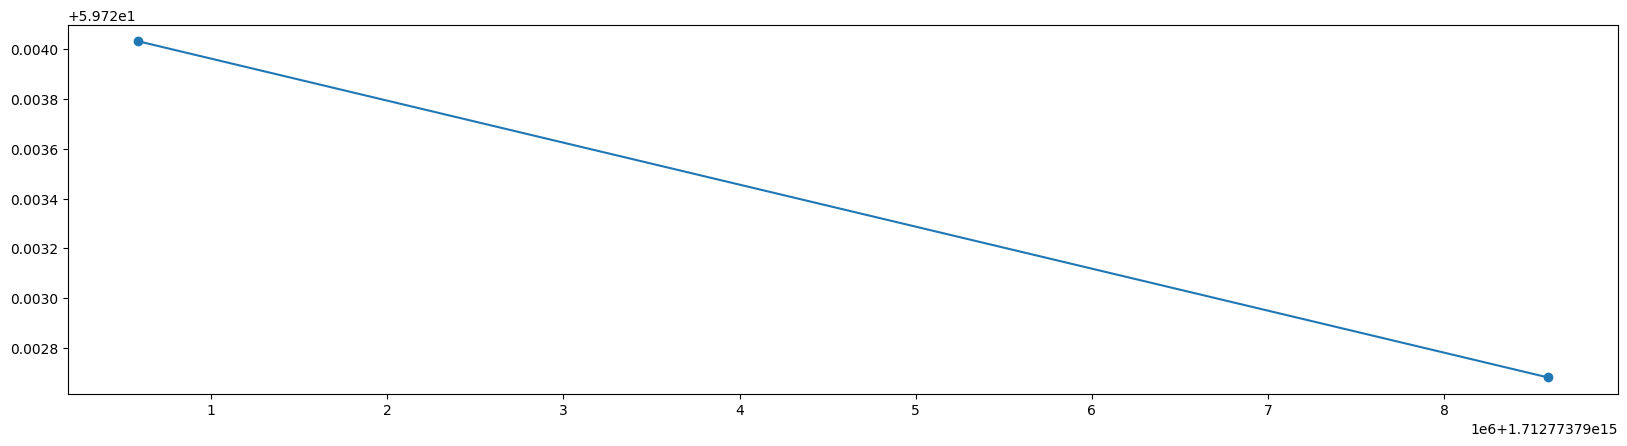

In [16]:
# visualize gps values

gpsLat = gpsDfcs.latitude.to_numpy()
gpsLon = gpsDfcs.longitude.to_numpy()


plt.figure().set_figwidth(20)
# plt.plot(acTimes, acX, '-o')
# plt.plot(acTimes, acY, '-o')
plt.plot(gpsTimes, gpsLat, '-o')

# plt.plot(gyTimes, gyX, '-o')
# plt.plot(gyTimes, gyY, '-o')
# plt.plot(gpsTimes, gpsLon, '-o')


In [17]:
# interpolate gps (for each one half of window)
gpsLoni = np.interp(gpsInterpTimes, gpsTimes, gpsLon)
gpsLati = np.interp(gpsInterpTimes, gpsTimes, gpsLat)


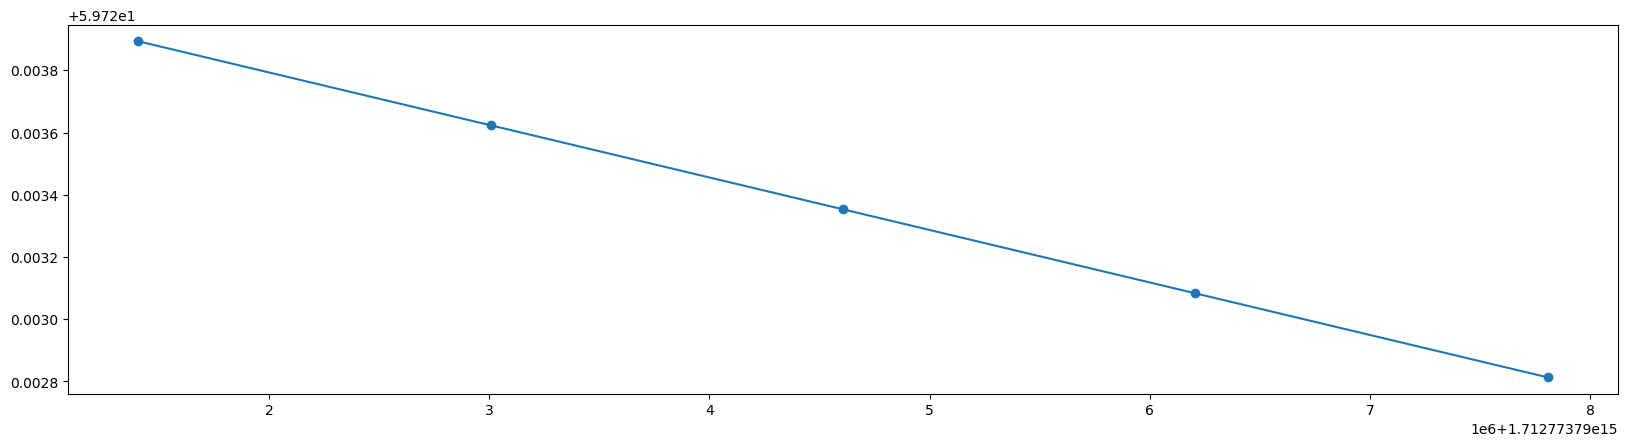

In [18]:
plt.figure().set_figwidth(20)
# plt.plot(acTimes, acX, '-o')
# plt.plot(acTimes, acY, '-o')
plt.plot(gpsInterpTimes, gpsLati, '-o')

# plt.plot(gyTimes, gyX, '-o')
# plt.plot(gyTimes, gyY, '-o')
# plt.plot(gpsTimes, gpsLon, '-o')
